In [ ]:
!pip install  plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
upload=files.upload()

Saving layoffs_data(1).csv to layoffs_data(1).csv


In [ ]:
data=pd.read_csv("layoffs_data(1).csv")

In [ ]:
data.head(5)

In [ ]:
data.shape

(3374, 12)

In [ ]:
data.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,2219.000000,2172.000000,3014.000000
mean,247.385759,0.277849,774.266986
std,781.980691,0.282074,4850.752433
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,51.000000
50%,80.000000,0.170000,163.000000
75%,180.000000,0.300000,455.200000
max,12000.000000,1.000000,121900.000000


In [ ]:
data.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1155
Percentage                    1202
Date                             0
Source                           0
Funds_Raised                   360
Stage                            0
Date_Added                       0
Country                          0
List_of_Employees_Laid_Off       1
dtype: int64

In [ ]:
#creating a new column for showing the year of layoff
data['layoff_year'] = pd.to_datetime(data['Date']).dt.year

<ipython-input-9-9cd6c039149f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['layoff_year'] = pd.to_datetime(data['Date']).dt.year


In [ ]:
#Droping the rows wich are not having the Laid_Off_Count
data.dropna(subset=['Laid_Off_Count'], inplace=True)

In [ ]:
print(data.columns)

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off', 'layoff_year'],
      dtype='object')


In [ ]:
#droping the unuseful Columns cleaning data
columns_to_drop = ['Source', 'Date_Added', 'List_of_Employees_Laid_Off']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.head(5)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,layoff_year
0,Salesforce,SF Bay Area,Sales,700.0,0.01,26-01-2024,65.0,Post-IPO,United States,2024
2,Microsoft,Seattle,Other,1900.0,NaN,25-01-2024,1.0,Post-IPO,United States,2024
3,Swiggy,Bengaluru,Food,400.0,0.07,25-01-2024,3600.0,Unknown,India,2024
4,Veho,Boulder,Logistics,65.0,0.19,25-01-2024,299.0,Series B,United States,2024
8,Personio,Munich,HR,100.0,NaN,24-01-2024,724.0,Series E,Germany,2024


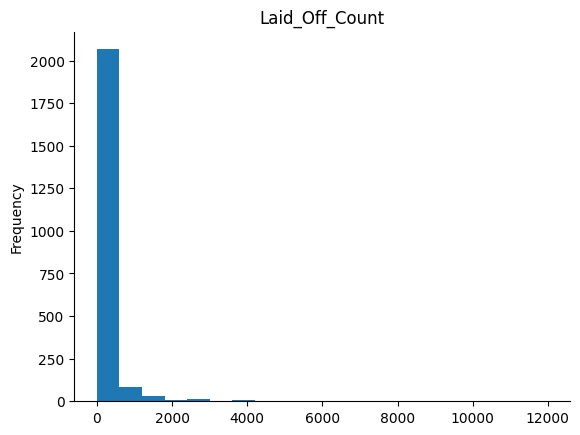

In [ ]:
# Laid_Off_Count
data['Laid_Off_Count'].plot(kind='hist', bins=20, title='Laid_Off_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

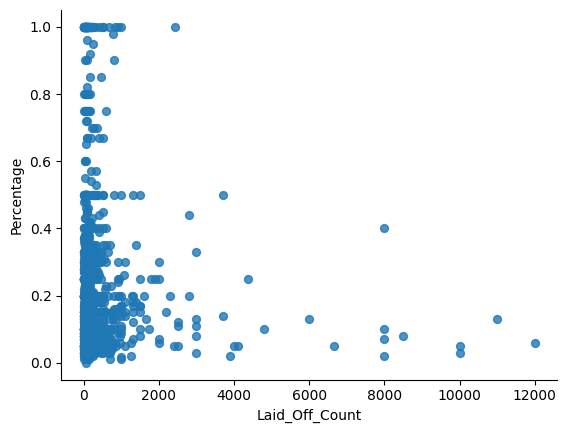

In [ ]:
#Laid_Off_Count vs Percentage
data.plot(kind='scatter', x='Laid_Off_Count', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Visualize the number Layoffs from 2020 to 2024 by Years

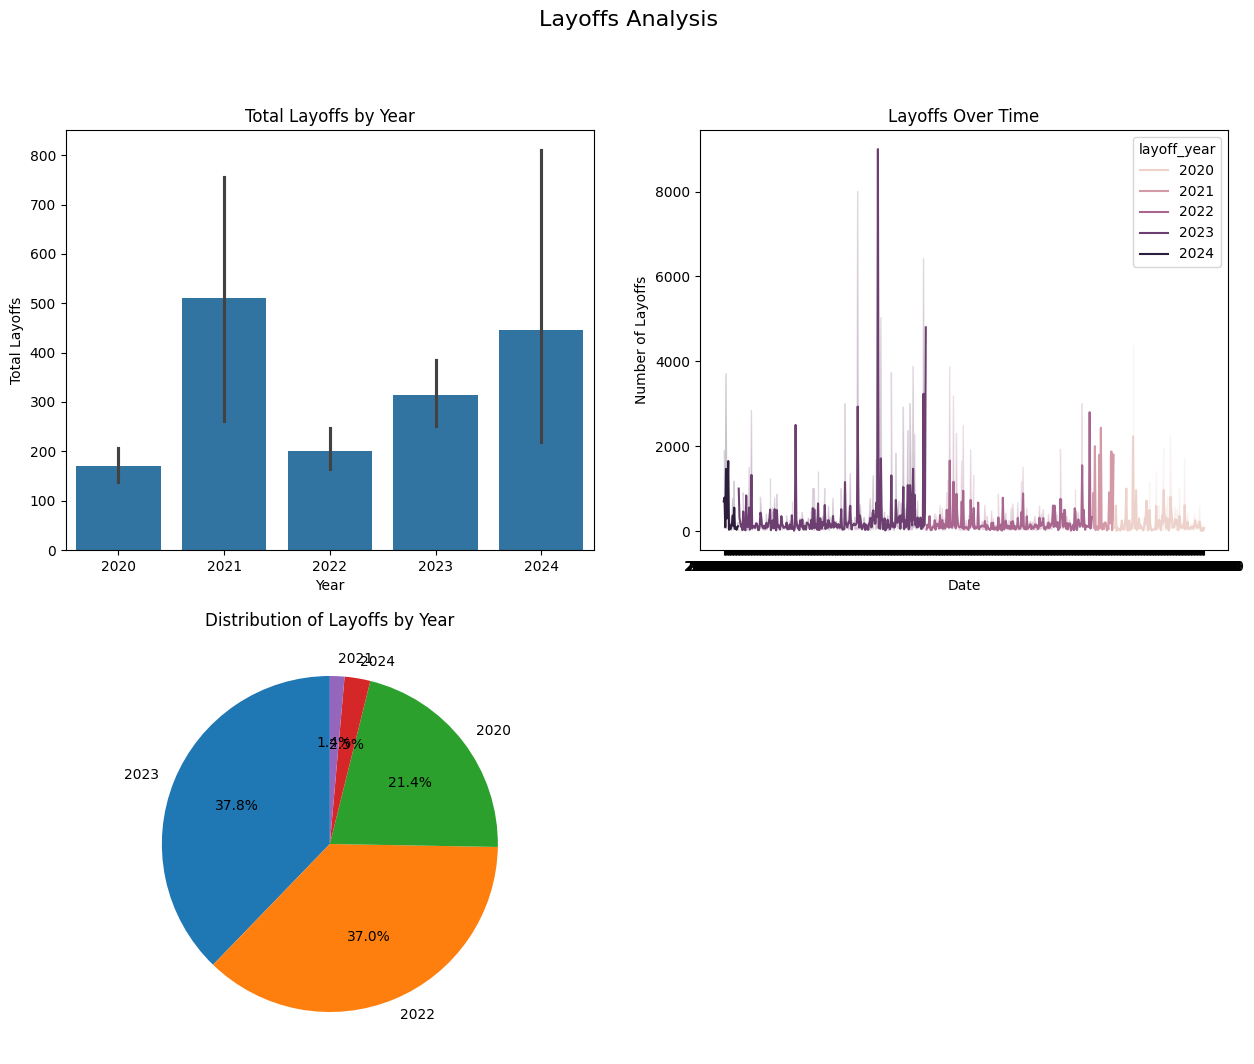

In [ ]:
# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Layoffs Analysis', fontsize=16)

# Bar plot for Total Layoffs by Year
sns.barplot(x='layoff_year', y='Laid_Off_Count', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Total Layoffs by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Layoffs')

# Line plot for Layoffs over time
sns.lineplot(x='Date', y='Laid_Off_Count', data=data, hue='layoff_year', ax=axes[0, 1])
axes[0, 1].set_title('Layoffs Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Layoffs')

# Pie chart for Percentage of Layoffs by Year
layoffs_by_year = data['layoff_year'].value_counts()
axes[1, 0].pie(layoffs_by_year, labels=layoffs_by_year.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution of Layoffs by Year')



# Removing an empty subplot
fig.delaxes(axes[1, 1])

plt.show()

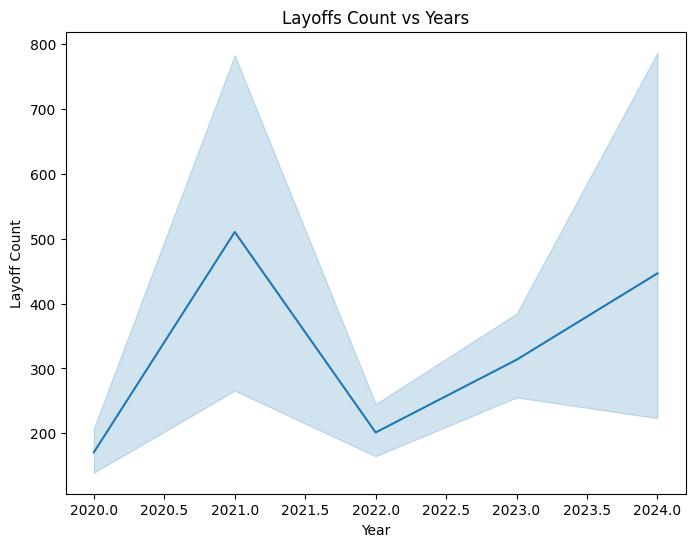

In [ ]:
#Layoffs Count vs Years
plt.figure(figsize=(8, 6))
sns.lineplot(x='layoff_year', y='Laid_Off_Count', data=data)
plt.title('Layoffs Count vs Years')
plt.xlabel('Year')
plt.ylabel('Layoff Count')
plt.show()


Analyze Layoffs Grouped by Continents

In [ ]:
laidOff_countByCountry = data.groupby('Country', as_index=False).sum()


<ipython-input-17-831bb0bfa4ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countByCountry = data.groupby('Country', as_index=False).sum()


In [ ]:
unique_countries = data['Country'].unique()
unique_countries

array(['United States', 'India', 'Germany', 'Sweden', 'United Kingdom',
       'Israel', 'Estonia', 'Canada', 'Singapore', 'China', 'Poland',
       'Nigeria', 'Finland', 'France', 'Netherlands', 'Brazil', 'Ghana',
       'Kenya', 'Norway', 'Australia', 'Ireland', 'Indonesia',
       'New Zealand', 'Cayman Islands', 'Spain', 'South Korea', 'Romania',
       'Chile', 'Saudi Arabia', 'Ukraine', 'Switzerland', 'Austria',
       'Japan', 'Colombia', 'Argentina', 'Mexico', 'Luxembourg',
       'Denmark', 'Thailand', 'Lithuania', 'Senegal', 'Hong Kong',
       'United Arab Emirates', 'Malaysia', 'Russia', 'Seychelles',
       'Bulgaria', 'Portugal', 'Myanmar'], dtype=object)

In [ ]:
# Create a mapping of countries to continents
country_to_continent = {
    'United States': 'North America',
    'India': 'Asia',
    'Germany': 'Europe',
    'Sweden': 'Europe',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'Estonia': 'Europe',
    'Canada': 'North America',
    'Singapore': 'Asia',
    'China': 'Asia',
    'Poland': 'Europe',
    'Nigeria': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'Brazil': 'South America',
    'Ghana': 'Africa',
    'Kenya': 'Africa',
    'Norway': 'Europe',
    'Australia': 'Oceania',
    'Ireland': 'Europe',
    'Indonesia': 'Asia',
    'New Zealand': 'Oceania',
    'Cayman Islands': 'North America',
    'Spain': 'Europe',
    'South Korea': 'Asia',
    'Romania': 'Europe',
    'Chile': 'South America',
    'Saudi Arabia': 'Asia',
    'Ukraine': 'Europe',
    'Switzerland': 'Europe',
    'Austria': 'Europe',
    'Japan': 'Asia',
    'Colombia': 'South America',
    'Argentina': 'South America',
    'Mexico': 'North America',
    'Luxembourg': 'Europe',
    'Denmark': 'Europe',
    'Thailand': 'Asia',
    'Lithuania': 'Europe',
    'Senegal': 'Africa',
    'Hong Kong': 'Asia',
    'United Arab Emirates': 'Asia',
    'Malaysia': 'Asia',
    'Russia': 'Europe',
    'Seychelles': 'Africa',
    'Bulgaria': 'Europe',
    'Portugal': 'Europe',
    'Myanmar': 'Asia'
}

# Group countries by continent
asia = [country for country, continent in country_to_continent.items() if continent == 'Asia']
europe = [country for country, continent in country_to_continent.items() if continent == 'Europe']
north_america = [country for country, continent in country_to_continent.items() if continent == 'North America']
oceania = [country for country, continent in country_to_continent.items() if continent == 'Oceania']
south_america = [country for country, continent in country_to_continent.items() if continent == 'South America']
africa = [country for country, continent in country_to_continent.items() if continent == 'Africa']

# Display the relevant countries for each continent
print(f"Asia = {asia}")
print(f"Europe = {europe}")
print(f"North America = {north_america}")
print(f"Oceania = {oceania}")
print(f"South America = {south_america}")
print(f"Africa = {africa}")


Asia = ['India', 'Israel', 'Singapore', 'China', 'Indonesia', 'South Korea', 'Saudi Arabia', 'Japan', 'Thailand', 'Hong Kong', 'United Arab Emirates', 'Malaysia', 'Myanmar']
Europe = ['Germany', 'Sweden', 'United Kingdom', 'Estonia', 'Poland', 'Finland', 'France', 'Netherlands', 'Norway', 'Ireland', 'Spain', 'Romania', 'Ukraine', 'Switzerland', 'Austria', 'Luxembourg', 'Denmark', 'Lithuania', 'Russia', 'Bulgaria', 'Portugal']
North America = ['United States', 'Canada', 'Cayman Islands', 'Mexico']
Oceania = ['Australia', 'New Zealand']
South America = ['Brazil', 'Chile', 'Colombia', 'Argentina']
Africa = ['Nigeria', 'Ghana', 'Kenya', 'Senegal', 'Seychelles']


In [ ]:
Asia = ['India', 'Israel', 'Singapore', 'China', 'Indonesia', 'South Korea', 'Saudi Arabia', 'Japan', 'Thailand', 'Hong Kong', 'United Arab Emirates', 'Malaysia', 'Myanmar']
Europe = ['Germany', 'Sweden', 'United Kingdom', 'Estonia', 'Poland', 'Finland', 'France', 'Netherlands', 'Norway', 'Ireland', 'Spain', 'Romania', 'Ukraine', 'Switzerland', 'Austria', 'Luxembourg', 'Denmark', 'Lithuania', 'Russia', 'Bulgaria', 'Portugal']
North_America = ['United States', 'Canada', 'Cayman Islands', 'Mexico']
South_America = ['Brazil', 'Chile', 'Colombia', 'Argentina']
Oceania = ['Australia', 'New Zealand']
Africa = ['Nigeria', 'Ghana', 'Kenya', 'Senegal', 'Seychelles']

In [ ]:
# Create subsets of data for each continent
asia_subset = laidOff_countByCountry[laidOff_countByCountry['Country'].isin(Asia)]
europe_subset = laidOff_countByCountry[laidOff_countByCountry['Country'].isin(Europe)]
north_america_subset = laidOff_countByCountry[laidOff_countByCountry['Country'].isin(North_America)]
south_america_subset = laidOff_countByCountry[laidOff_countByCountry['Country'].isin(South_America)]
africa_subset = laidOff_countByCountry[laidOff_countByCountry['Country'].isin(Africa)]
oceania_subset = laidOff_countByCountry[laidOff_countByCountry['Country'].isin(Oceania)]


<ipython-input-27-9505d841c024>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=current_continent_data, y='Laid_Off_Count', x='Country', palette=palette)
<ipython-input-27-9505d841c024>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=current_continent_data, y='Laid_Off_Count', x='Country', palette=palette)
<ipython-input-27-9505d841c024>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=current_continent_data, y='Laid_Off_Count', x='Country', palette=palette)
<ipython-input-27-9505d841c024>:21: FutureWarning: 

Passing `pa

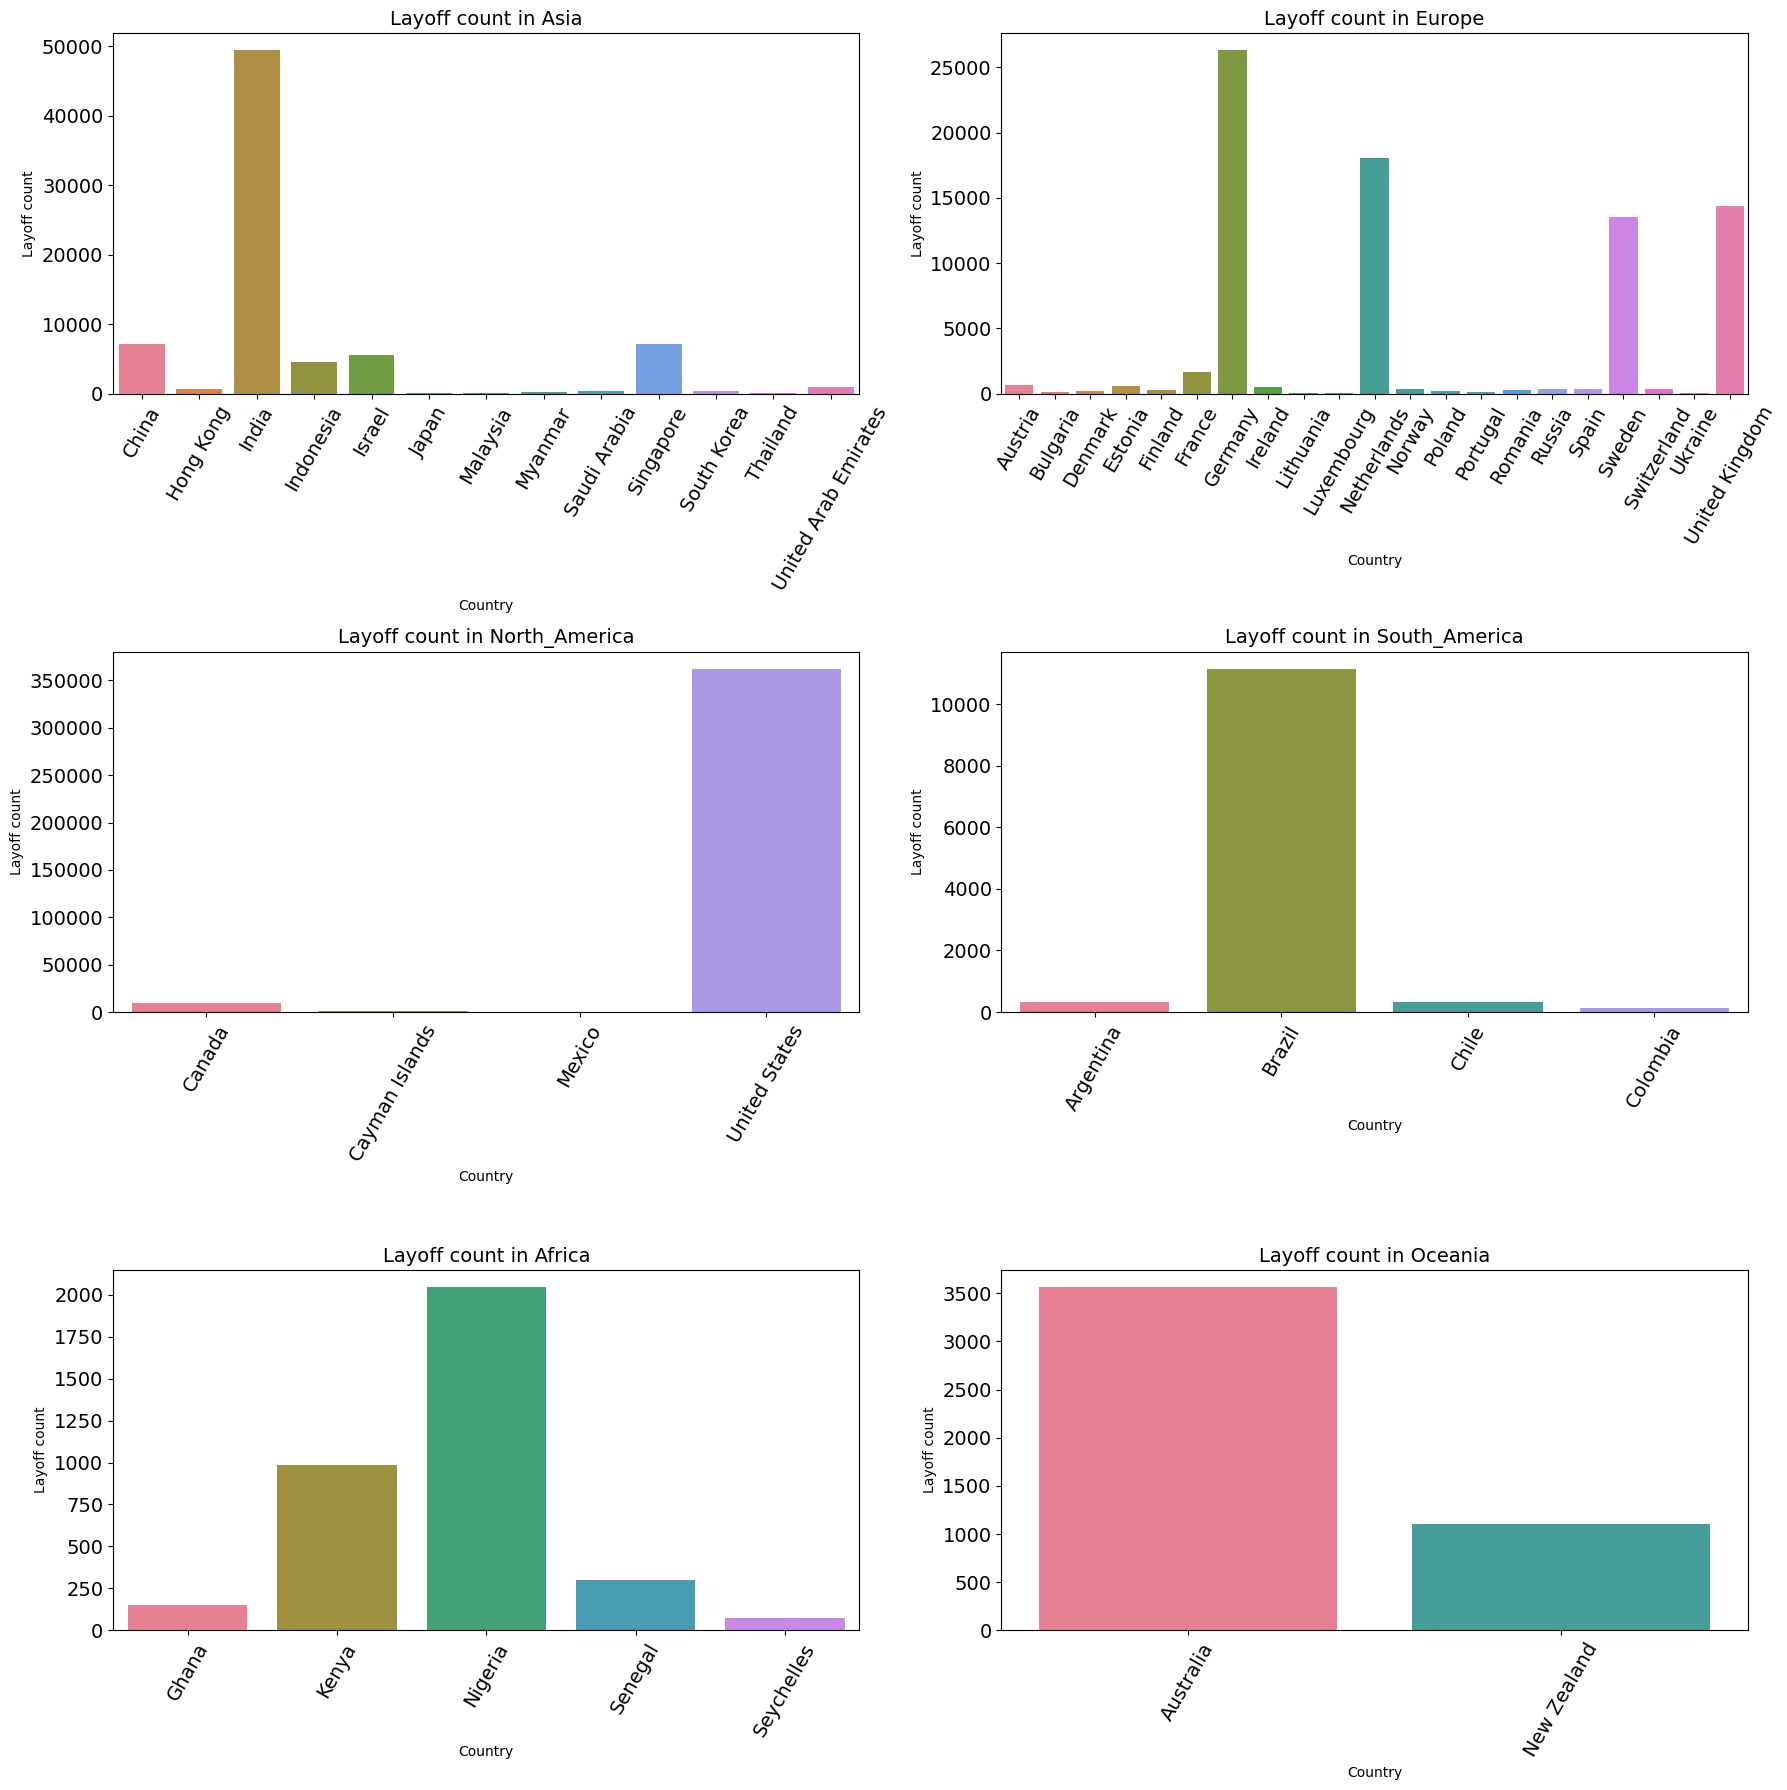

In [ ]:
# Set the figure size
plt.figure(figsize=(18, 18))

# List of continent names
continents = ['Asia', 'Europe', 'North_America', 'South_America', 'Africa', 'Oceania']

# Loop through each continent
for i, continent in enumerate(continents, 1):
    # Create a subplot
    plt.subplot(3, 2, i)

    # Filter data for the current continent
    current_continent_data = globals().get(f"{continent.lower()}_subset")

    # Check if the current continent data exists
    if current_continent_data is not None:
        # Define a custom color palette for each country
        palette = sns.color_palette("husl", n_colors=len(current_continent_data['Country'].unique()))

        # Create a bar plot with the custom color palette
        sns.barplot(data=current_continent_data, y='Laid_Off_Count', x='Country', palette=palette)

        # Customize the plot
        plt.xticks(rotation=60)
        plt.xlabel('Country'), plt.ylabel('Layoff count')
        plt.title(f"Layoff count in {continent}", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)
    else:
        print(f"Subset data for {continent} not found.")



# Adjust layout and show the plot
plt.tight_layout()
plt.show()


visualizing the Highest Layoff countries

<ipython-input-28-306a0919f7b2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_layoffs_data, x='Country', y='Laid_Off_Count', palette='viridis')


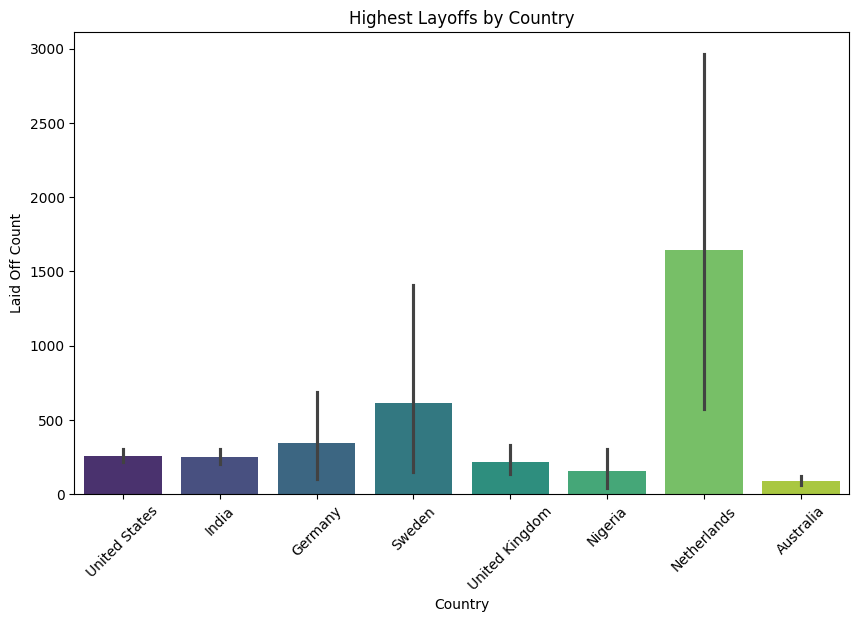

In [ ]:
# List of countries with highest layoffs
High_layoff_countries = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

# Filter data for the specified countries
highest_layoffs_data = data[data['Country'].isin(High_layoff_countries)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(data=highest_layoffs_data, x='Country', y='Laid_Off_Count', palette='viridis')

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.title('Highest Layoffs by Country')

# Show the plot
plt.show()


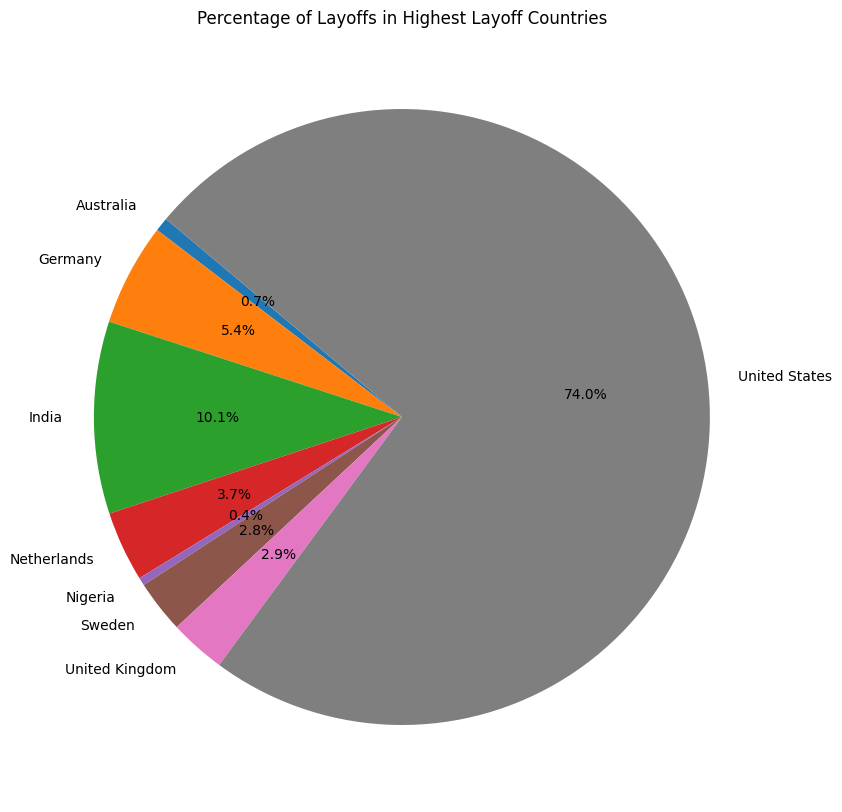

In [ ]:
# List of countries with highest layoffs
High_layoff_countries = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

# Filter data for the specified countries
highest_layoffs_data = data[data['Country'].isin(High_layoff_countries)]

# Calculate the total layoff count for each country
total_layoffs_by_country = highest_layoffs_data.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_layoffs_by_country['Laid_Off_Count'], labels=total_layoffs_by_country['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Layoffs in Highest Layoff Countries')
plt.show()


Text(0.5, 1.0, 'Top 5 Industries Most Affected by Layoffs')

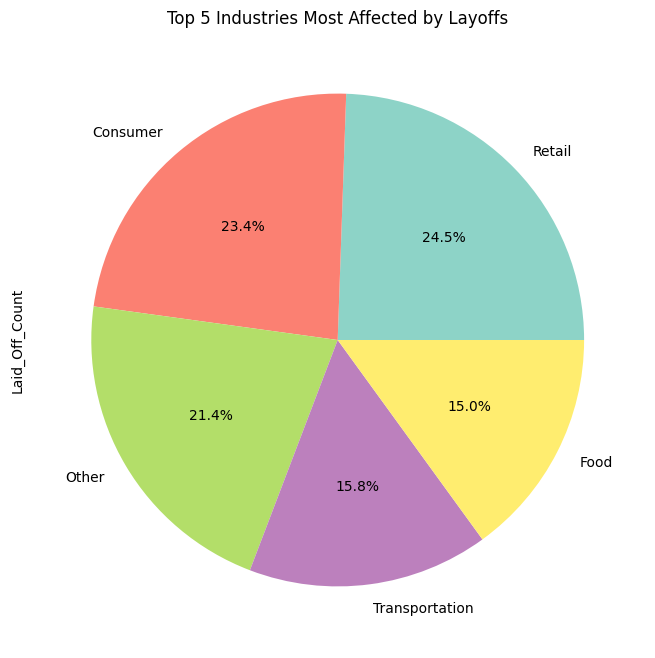

In [ ]:
#Top 5 industries most effected by layoffs
top_industries = data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head()
top_industries.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colormap='Set3')
plt.title('Top 5 Industries Most Affected by Layoffs')

<ipython-input-32-de24dd13e28f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industries = data.groupby('Industry').sum()['Laid_Off_Count'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')


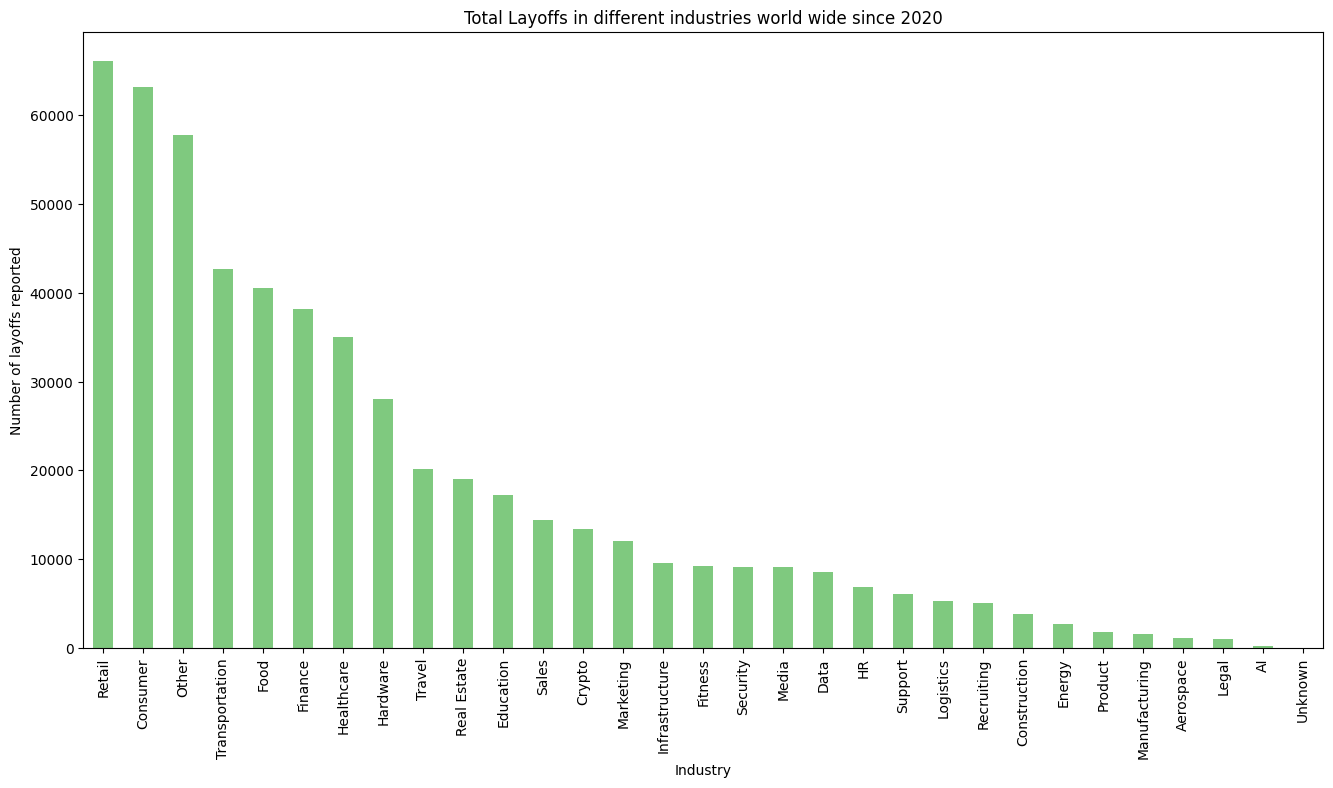

In [ ]:
#total layoffs in different companys since 2020
plt.figure(figsize=(10, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = data.groupby('Industry').sum()['Laid_Off_Count'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
df = data.set_index('Date')
df_2022 = df.loc[:'2022']
df_2021 = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]

In [ ]:
#Year 2022 Top 5 companies that laid off their employees
df_2022_most_layoffs = df_2022.sort_values(by='Laid_Off_Count', ascending=False)
df_2022_most_layoffs.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country,layoff_year
Date,,,,,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000.0,0.13,26000.0,Post-IPO,United States,2022
2022-11-16,Amazon,Seattle,Retail,10000.0,0.03,108.0,Post-IPO,United States,2022
2020-07-30,Booking.com,Amsterdam,Travel,4375.0,0.25,NaN,Acquired,Netherlands,2020
2022-11-16,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2.0,Post-IPO,United States,2022
2022-10-24,Philips,Amsterdam,Healthcare,4000.0,0.05,NaN,Post-IPO,Netherlands,2022


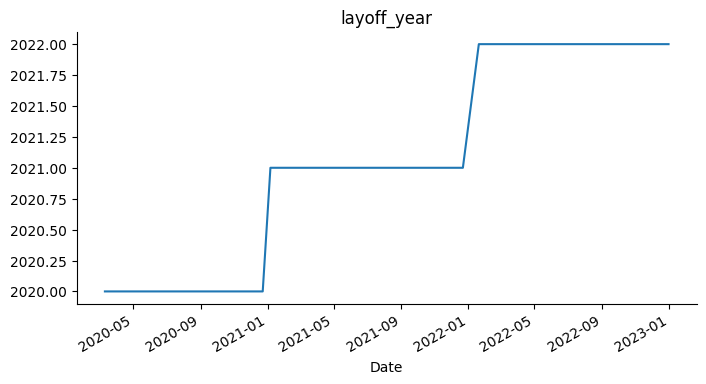

In [ ]:
#  layoff_year
df_2022_most_layoffs['layoff_year'].plot(kind='line', figsize=(8, 4), title='layoff_year')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': '2022 layoffs by industry world wide'}, xlabel='Industry', ylabel='No of layoffs'>

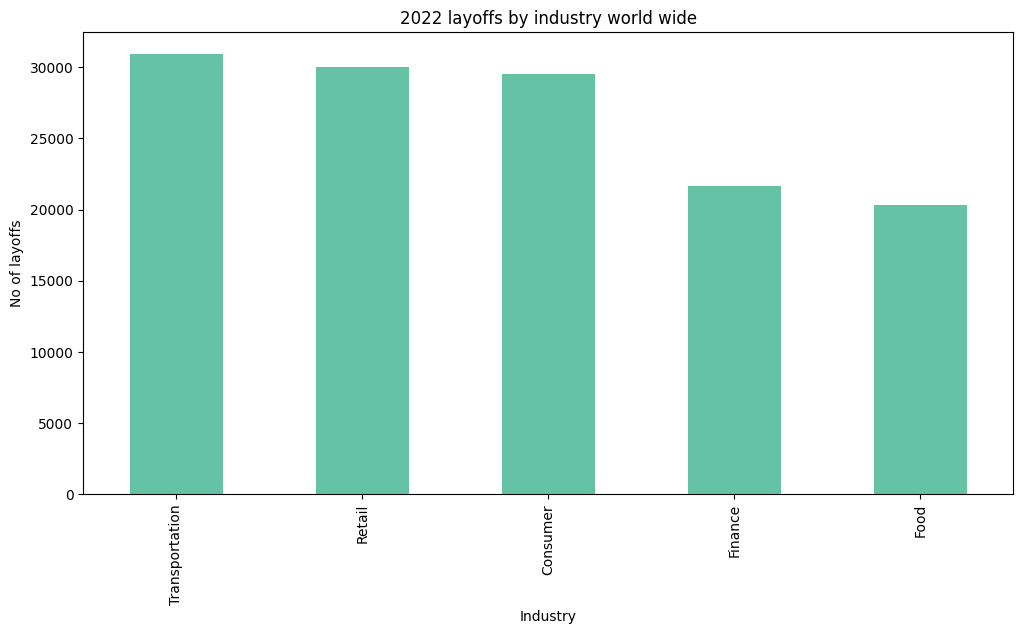

In [ ]:
df_2022.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head().plot(title ="2022 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Set2')

In [ ]:
df_2021_most_layoffs = df_2021.sort_values(by='Laid_Off_Count', ascending=False)
df_2021_most_layoffs.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country,layoff_year
Date,,,,,,,,,
2021-06-01,Katerra,SF Bay Area,Construction,2434.0,1.00,1600.0,Unknown,United States,2021
2021-11-02,Zillow,Seattle,Real Estate,2000.0,0.25,97.0,Post-IPO,United States,2021
2021-01-21,Instacart,SF Bay Area,Food,1877.0,NaN,2400.0,Unknown,United States,2021
2021-01-06,WhiteHat Jr,Mumbai,Education,1800.0,NaN,11.0,Acquired,India,2021
2021-08-05,Bytedance,Shanghai,Consumer,1800.0,NaN,9400.0,Unknown,China,2021


<Axes: title={'center': '2021 layoffs by industry world wide'}, xlabel='Industry', ylabel='No of layoffs'>

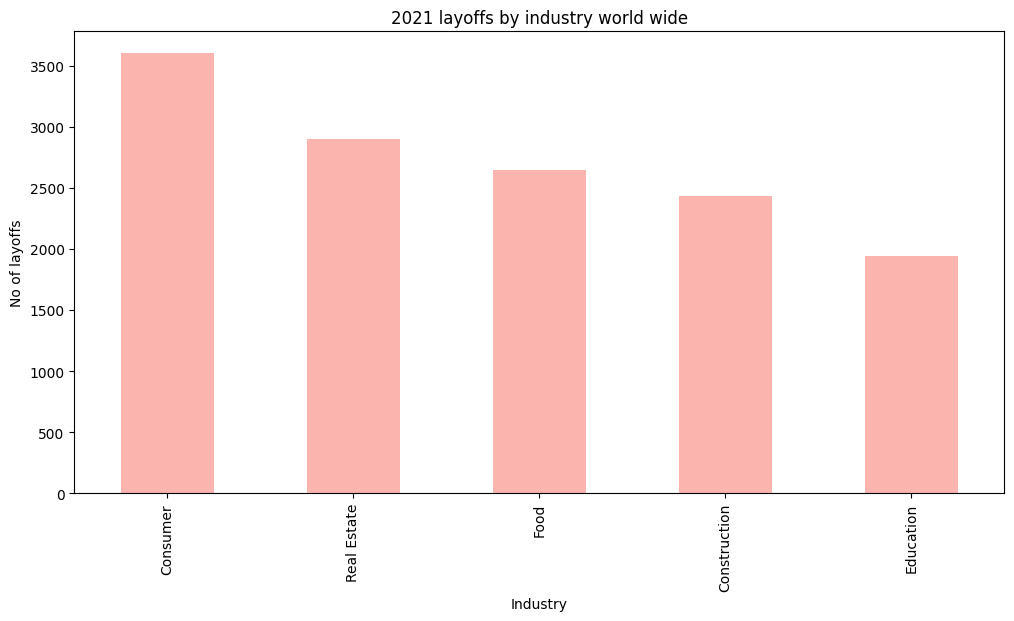

In [ ]:
df_2021.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head().plot(title ="2021 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Pastel1')

In [ ]:
#Year 2020 Top 5 companies that laid off their employees
df_2020_most_layoffs = df_2020.sort_values(by='Laid_Off_Count', ascending=False)
df_2020_most_layoffs.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country,layoff_year
Date,,,,,,,,,
2020-07-30,Booking.com,Amsterdam,Travel,4375.0,0.25,NaN,Acquired,Netherlands,2020
2020-05-06,Uber,SF Bay Area,Transportation,3700.0,0.14,24700.0,Post-IPO,United States,2020
2020-05-18,Uber,SF Bay Area,Transportation,3000.0,0.13,24700.0,Post-IPO,United States,2020
2020-04-13,Groupon,Chicago,Retail,2800.0,0.44,1400.0,Post-IPO,United States,2020
2020-05-05,Airbnb,SF Bay Area,Travel,1900.0,0.25,5400.0,Private Equity,United States,2020


<Axes: title={'center': '2020 layoffs by industry world wide'}, xlabel='Industry', ylabel='No of layoffs'>

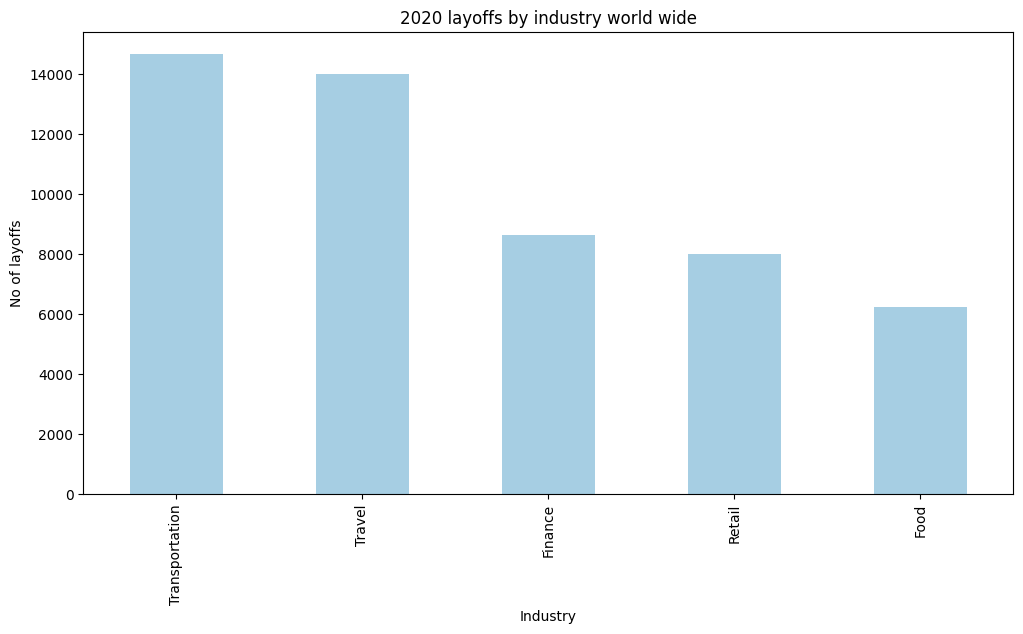

In [ ]:
df_2020.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head().plot(title ="2020 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Paired')

Analyze Companies with 100% Layoff Rate

In [ ]:
# Create a subset of data where the layoff rate is 100%
full_layoff_data = data[data['Percentage'].isin([1.00])].dropna()
full_layoff_data.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,layoff_year
91,Frontdesk,Milwaukee,Travel,200.0,1.0,2024-01-02,26.0,Unknown,United States,2024
129,Zulily,Seattle,Retail,839.0,1.0,2023-12-08,194.0,Acquired,United States,2023
136,ZestMoney,Bengaluru,Finance,150.0,1.0,2023-12-05,120.0,Series C,India,2023
241,Convoy,Seattle,Logistics,500.0,1.0,2023-10-19,1100.0,Series E,United States,2023
427,Dealtale,Tel Aviv,Sales,70.0,1.0,2023-08-09,2.0,Acquired,United States,2023


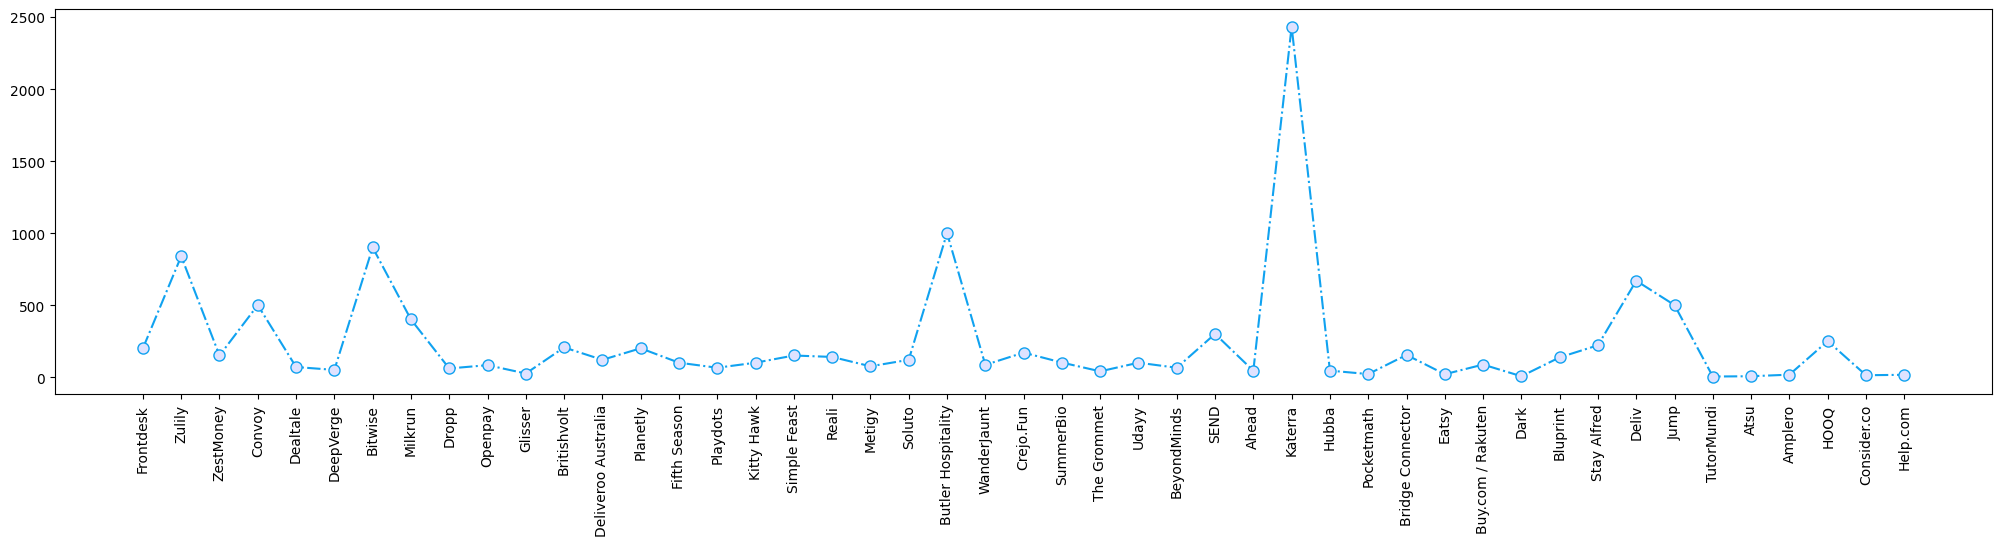

In [ ]:
plt.figure(figsize=(25,5))

plt.plot(full_layoff_data['Company'],full_layoff_data['Laid_Off_Count'], marker="o", linestyle='-.', color='#10a2f0',
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)
plt.show()

Locations of Companies with Full Layoffs

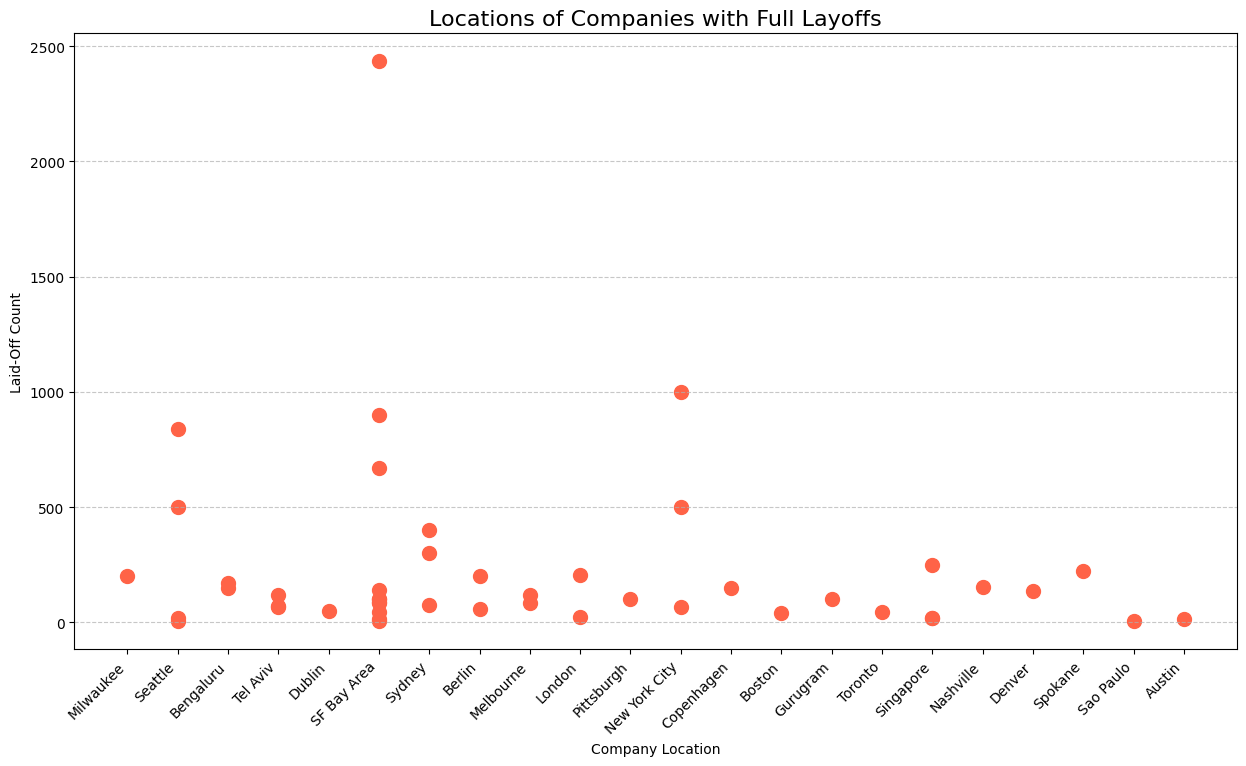

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create a scatter plot for the locations
plt.scatter(full_layoff_data['Location_HQ'], full_layoff_data['Laid_Off_Count'], color='#ff6347', marker='o', s=100)

# Customize the plot
plt.xlabel('Company Location')
plt.ylabel('Laid-Off Count')
plt.title('Locations of Companies with Full Layoffs', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Here we are dividing the layoff count in4 didderent groups

In [ ]:
#Layoff counts from 1 to 11000
grp1 = data[data['Laid_Off_Count'].isin(range(1, 30))]
grp2 = data[data['Laid_Off_Count'].isin(range(31, 70))]
grp3 = data[data['Laid_Off_Count'].isin(range(71, 150))]
grp4 = data[data['Laid_Off_Count'] > 150]


Visualize the all groups by countplot different types of Industries

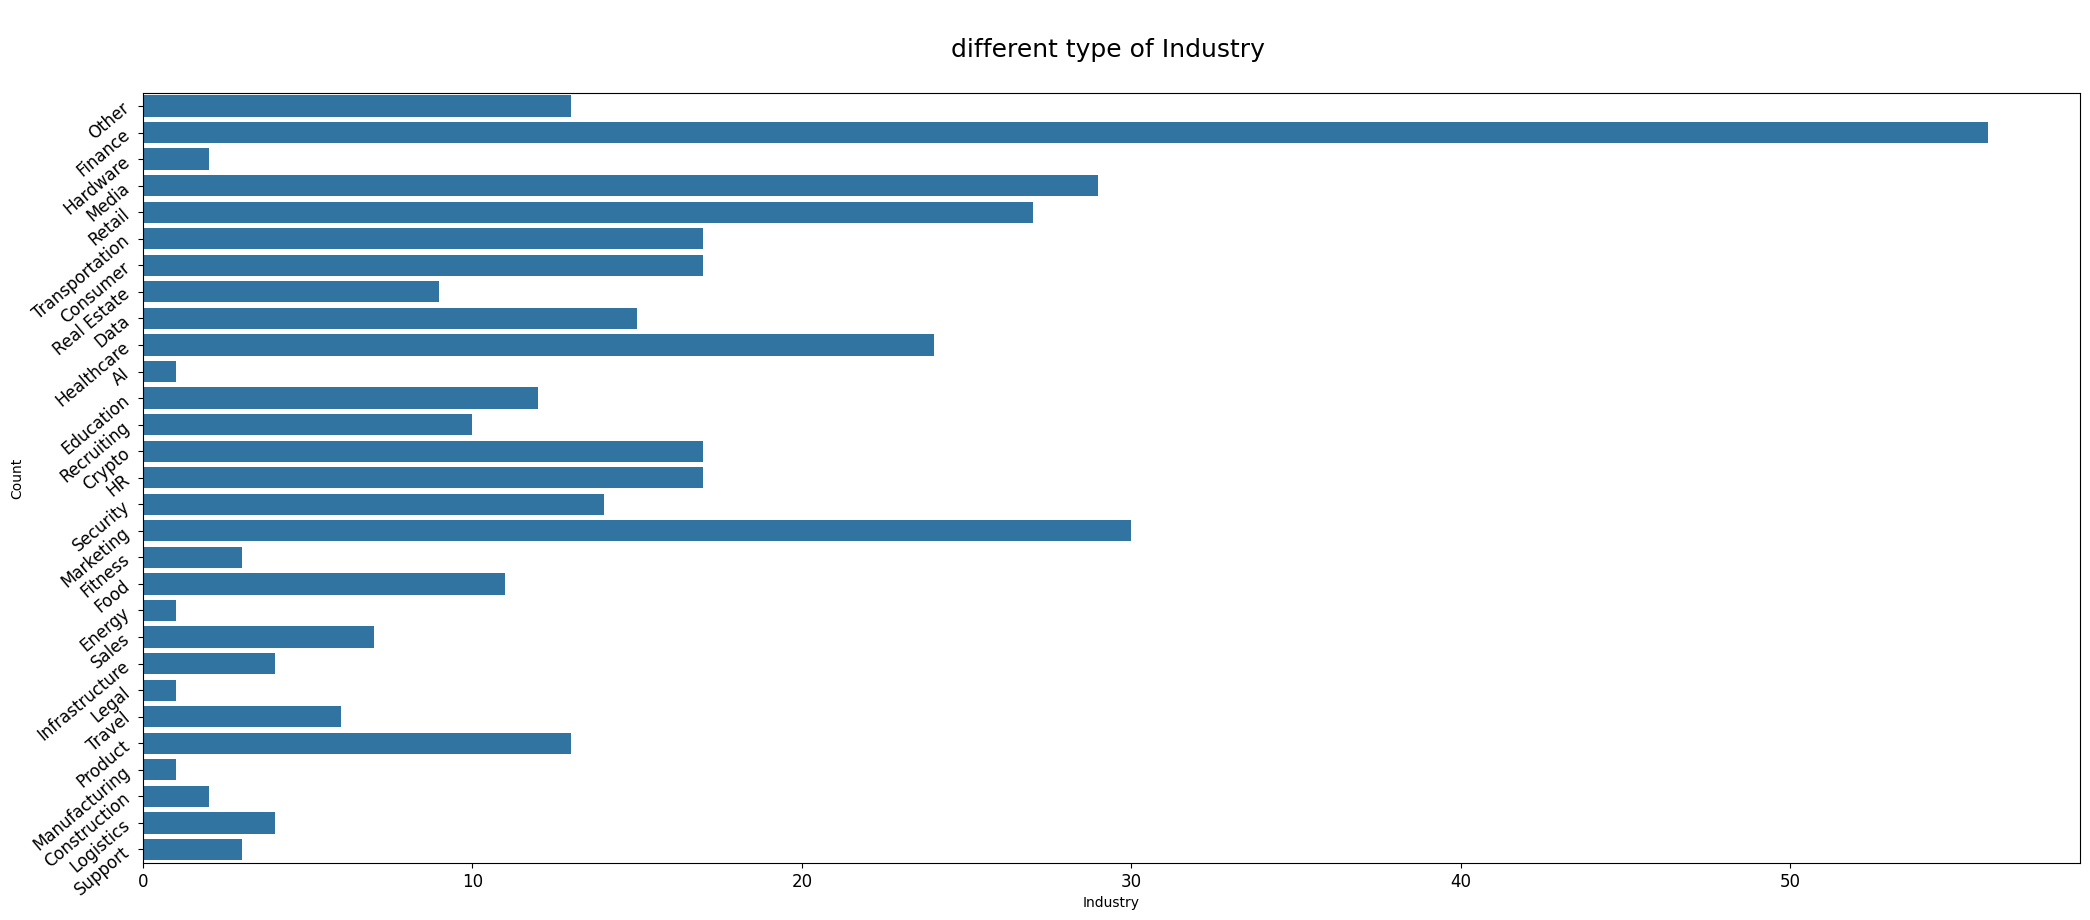

In [ ]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=grp1)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\ndifferent type of Industry \n", fontsize=18)

plt.show()

In [ ]:
#Top 10 companies have more layoffs
top_10_companies = grp4.nlargest(10, 'Laid_Off_Count')
top_10_companies

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,layoff_year
1276,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20,26.0,Post-IPO,United States,2023
1759,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,26000.0,Post-IPO,United States,2022
951,Meta,SF Bay Area,Consumer,10000.0,NaN,2023-03-14,26000.0,Post-IPO,United States,2023
1309,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18,1.0,Post-IPO,United States,2023
1691,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,108.0,Post-IPO,United States,2022
934,Amazon,Seattle,Retail,9000.0,NaN,2023-03-20,108.0,Post-IPO,United States,2023
1021,Ericsson,Stockholm,Other,8500.0,0.08,2023-02-24,663.0,Post-IPO,Sweden,2023
13,SAP,Walldorf,Other,8000.0,0.07,2024-01-23,1300.0,Post-IPO,Germany,2024
811,Flink,Berlin,Food,8000.0,0.40,2023-04-24,1000.0,Series B,Germany,2023
1451,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04,108.0,Post-IPO,United States,2023


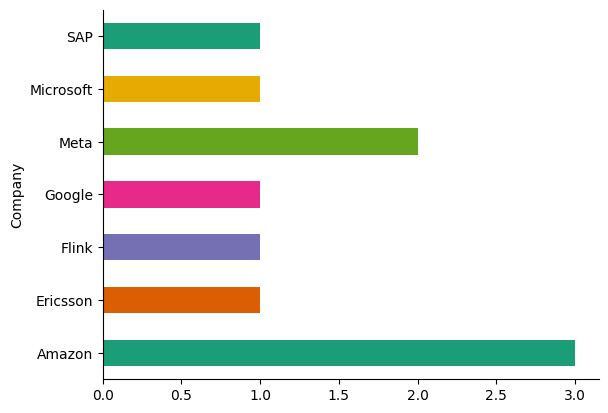

In [ ]:
#  Company
top_10_companies.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

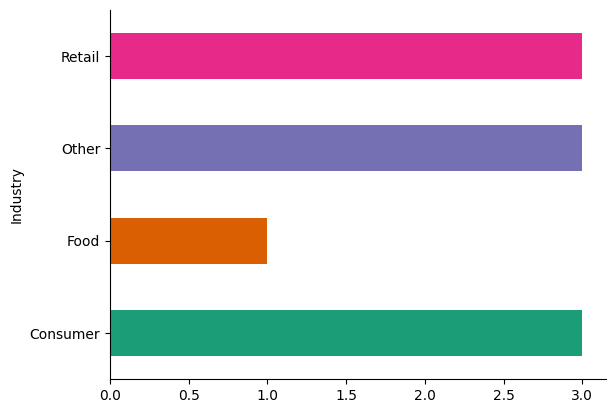

In [ ]:
#  Industry
top_10_companies.groupby('Industry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

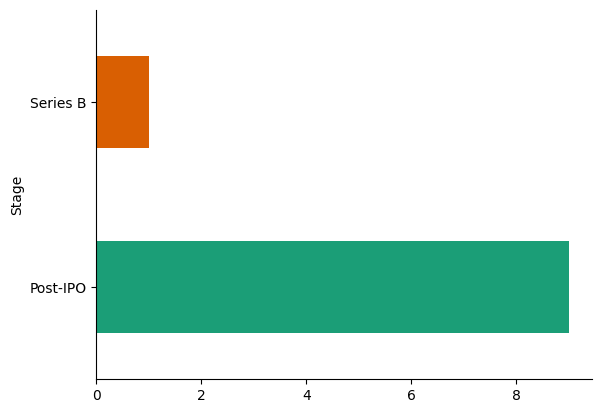

In [ ]:
#  Stage
top_10_companies.groupby('Stage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

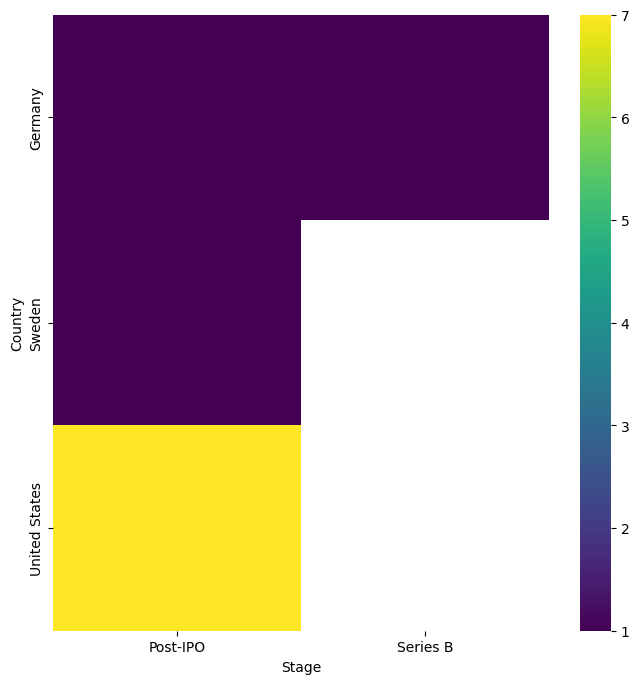

In [ ]:
# Stage vs Country
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country'].value_counts()
    for x_label, grp in top_10_companies.groupby('Stage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Stage')
_ = plt.ylabel('Country')

<ipython-input-92-94df4d629a25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(top_10_companies, x='Laid_Off_Count', y='Stage', inner='stick', palette='Dark2')


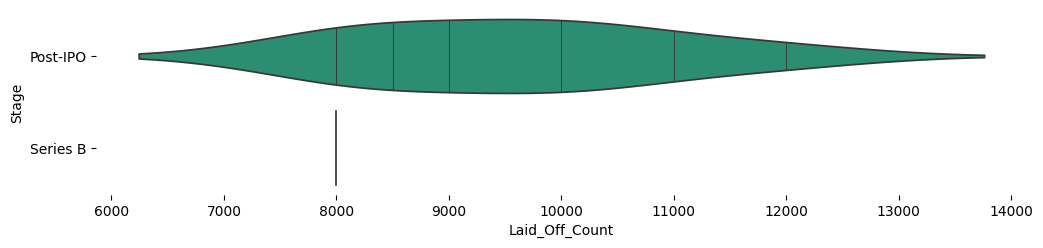

In [ ]:
# Stage vs Laid_Off_Count
figsize = (12, 1.2 * len(top_10_companies['Stage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_10_companies, x='Laid_Off_Count', y='Stage', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)